In [117]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import pickle
import gzip
%matplotlib inline

# Reading dataset

In [118]:
with gzip.open('../cache/dataset_fixed.pkl.gz', 'rb') as f:
    X, y = pickle.load(f)

In [119]:
len(X), len(y)

(18117, 18117)

In [120]:
a = [x for x, y_ in zip(X, y) if y_ == 0]
b = [x for x, y_ in zip(X, y) if y_ == 1]
c = [x for x, y_ in zip(X, y) if y_ == 2]

In [121]:
len(a), len(b), len(c)

(1647, 0, 16470)

In [122]:
from IPython.display import Audio, display

In [123]:
# wid = Audio(a[11], rate=22050)
wids = [Audio(a[i], rate=22050) for i in np.random.randint(0, len(a), 10)]

In [124]:
for w in wids:
    display(w)

In [125]:
# wid = Audio(a[11], rate=22050)
wids = [Audio(a[i], rate=22050) for i in np.random.randint(0, len(a), 10)]

In [126]:
for w in wids:
    display(w)

In [127]:
wids = [Audio(c[i], rate=22050) for i in np.random.randint(0, len(c), 10)]

In [128]:
for w in wids:
    display(w)

# Plots

In [129]:
def plot_waves(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        librosa.display.waveplot(np.array(f), sr=22050)
        plt.title(n.title())
        i += 1
    plt.show()
    

def plot_specgram(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.show()

    
def plot_log_power_specgram(sound_names, raw_sounds):
    i = 1
    l = len(raw_sounds)
    
    for n, f in zip(sound_names, raw_sounds):
        fig = plt.figure(figsize=(8, 5))
        D = librosa.logamplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        librosa.display.specshow(D, x_axis='time', y_axis='log')
        plt.title(n.title())
        i += 1
    plt.show()

In [130]:
plot_waves(['a', 'b', 'c'], [a[0], b[0], c[1]])

IndexError: list index out of range

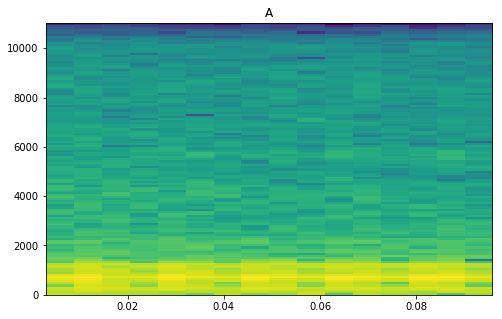

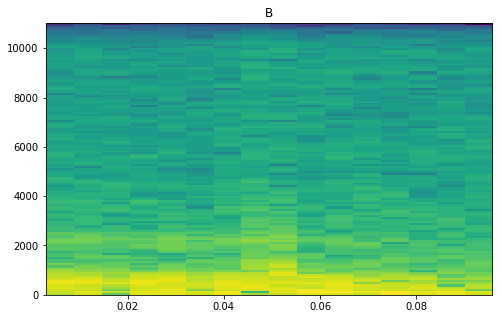

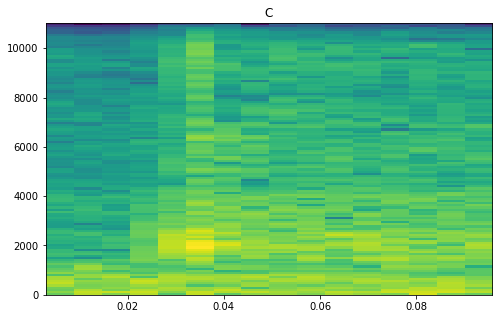

In [23]:
plot_specgram(['a', 'b', 'c'], [a[0], b[0], c[1]])

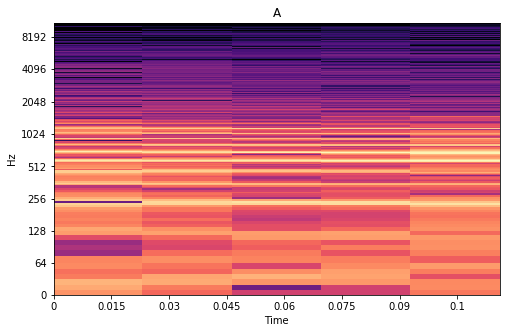

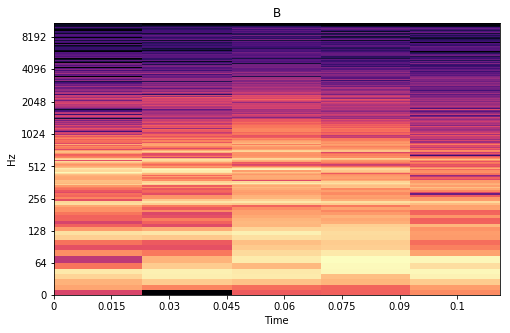

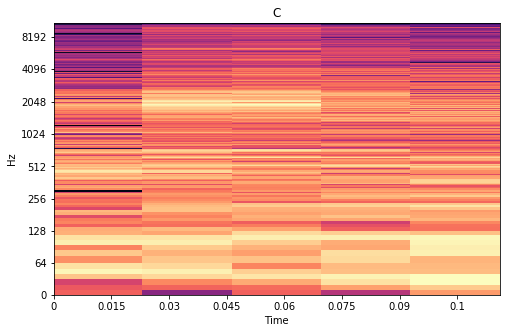

In [24]:
plot_log_power_specgram(['a', 'b', 'c'], [a[0], b[0], c[1]])

# Features

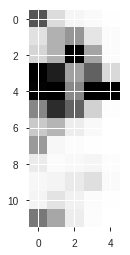

In [131]:
plt.imshow(np.square(librosa.feature.chroma_stft(a[1])))

In [132]:
librosa.feature.melspectrogram(a[1]).shape

(128, 5)

In [133]:
librosa.feature.spectral_contrast(a[1]).shape

(7, 5)

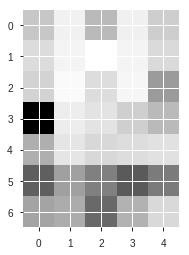

In [134]:
plt.imshow(np.square(librosa.feature.spectral_contrast(a[1])))

In [135]:
librosa.effects.harmonic(a[0]).shape

(2205,)

In [136]:
librosa.feature.tonnetz(librosa.effects.harmonic(a[1])).shape

(6, 5)

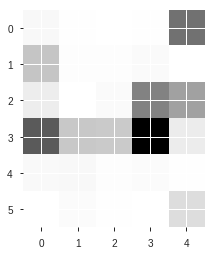

In [137]:
plt.imshow(np.square(librosa.feature.tonnetz(librosa.effects.harmonic(a[1]))))

In [139]:
def extract_feature(x, sample_rate=22050):
    stft = np.abs(librosa.stft(x))
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(x, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x),
    sr=sample_rate).T,axis=0)
    return np.hstack([mfccs,chroma,mel,contrast,tonnetz])

In [169]:
%time _ = extract_feature(X[0])

CPU times: user 60.9 ms, sys: 15 µs, total: 61 ms
Wall time: 64.8 ms


In [140]:
X_df = pd.DataFrame([extract_feature(x) for x in X])

/home/evgeny/miniconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [141]:
X_df.shape

(18117, 193)

In [142]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-309.038081,129.354164,26.745923,33.944602,-12.464922,16.458292,-24.954662,-18.320143,-3.431675,10.999683,...,19.342210,21.384792,20.630431,26.617467,0.001900,-0.013721,0.089582,0.080525,-0.008729,0.013023
1,-376.800530,173.556878,-5.449651,61.508521,17.561082,-20.053867,-1.814559,14.397237,-5.237715,-4.743479,...,20.167320,18.896015,20.039204,21.933711,0.012305,-0.030425,-0.066856,-0.096543,0.007250,-0.008360
2,-248.732204,159.358711,35.321485,22.820085,-11.004609,-10.452457,-2.787643,16.322586,0.722372,6.385740,...,21.760416,15.837450,16.692130,23.307308,-0.000007,0.066724,0.049738,0.166882,0.004340,0.017051
3,-208.680026,100.736557,-8.891545,65.937455,31.219220,-13.855843,9.183181,-15.861245,-19.639440,19.053750,...,17.364620,21.746465,27.945103,27.881475,-0.017295,0.012881,0.009756,-0.120570,-0.007179,-0.007750
4,-327.679920,52.644664,9.469324,72.510712,1.012579,3.858526,13.678246,11.813962,-9.814838,18.800054,...,17.199784,21.332811,22.603412,24.992947,-0.040959,-0.004513,-0.010136,-0.010491,-0.007303,0.015454


In [143]:
from pandas_profiling import ProfileReport

In [144]:
rep = ProfileReport(X_df)

In [145]:
rep.get_rejected_variables()

[159, 160]

In [146]:
X_df = X_df[X_df.columns[X_df.columns.isin(set(X_df.columns) -\
                                           set(rep.get_rejected_variables()))]]

## Models 

In [147]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [148]:
model = LGBMClassifier(n_estimators=100)

In [149]:
score = cross_val_score(model, X_df, y, cv=5)

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/

In [55]:
score.mean()

0.91056845409497811

In [150]:
score.mean()

0.96290805797398149

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2)

In [152]:
X_train.shape, X_test.shape

((14493, 191), (3624, 191))

In [153]:
model.fit(X_train, y_train)

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [154]:
pr = model.predict(X_test)

In [155]:
accuracy_score(y_test, pr)

0.96081677704194257

In [156]:
cm = confusion_matrix(y_test, pr)

In [157]:
cm

array([[ 252,   99],
       [  43, 3230]])

In [158]:
from sklearn.metrics import classification_report

In [159]:
print(classification_report(y_test, pr))

             precision    recall  f1-score   support

          0       0.85      0.72      0.78       351
          2       0.97      0.99      0.98      3273

avg / total       0.96      0.96      0.96      3624



In [161]:
sorted(zip(X_df.columns, model.feature_importance()), key=lambda x: -x[1])[:10]

/home/evgeny/miniconda3/lib/python3.6/site-packages/lightgbm/sklearn.py:588: LGBMDeprecationWarning: The `feature_importance()` method is deprecated and will be removed in 2.0.12 version. Please use attribute `feature_importances_` instead.
  'Please use attribute `feature_importances_` instead.', LGBMDeprecationWarning)


[(3, 84),
 (14, 75),
 (11, 71),
 (51, 65),
 (50, 60),
 (12, 52),
 (183, 44),
 (59, 39),
 (66, 39),
 (15, 38)]

In [166]:
%time model.predict(X_df.iloc[:1])

CPU times: user 28.1 ms, sys: 118 µs, total: 28.3 ms
Wall time: 14.2 ms


array([2])

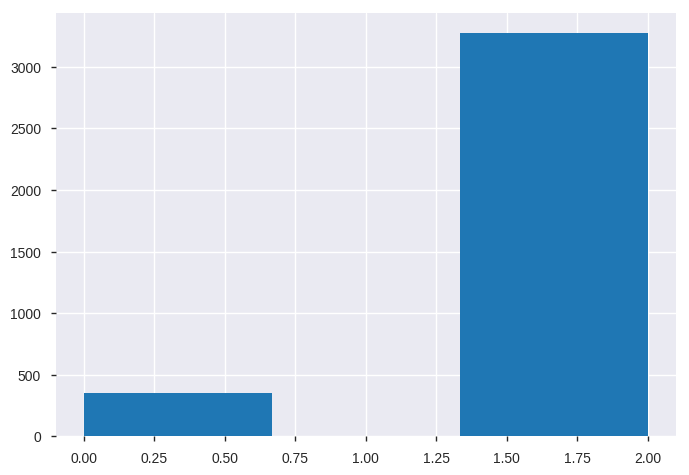

In [162]:
plt.hist(y_test, bins=3);

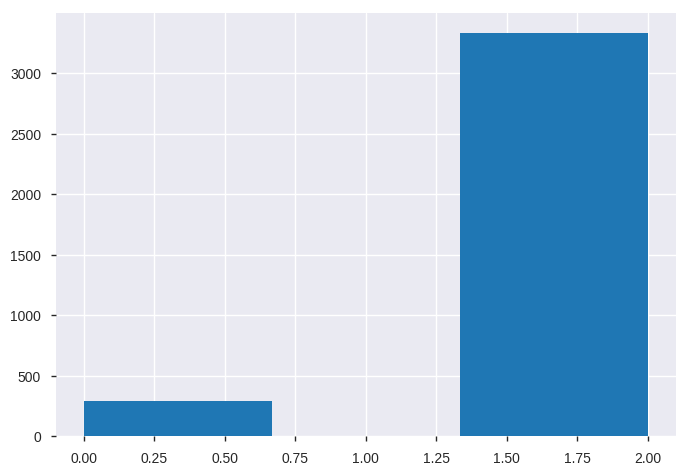

In [163]:
plt.hist(pr, bins=3);

In [164]:
accuracy_score(y_test, [2] * len(y_test))

0.90314569536423839

# Testing on new data

In [171]:
def get_praat_annotations(paths):
    dfs = []
    for path in paths:
        with open(path) as f:
            annotation = [l.strip() for l in f.readlines()]
            
        indxs = [i for i, l in enumerate(annotation) if l == '"IntervalTier"']
        annotation = annotation[indxs[0] + 5:indxs[1] if len(indxs) > 1\
                                else len(annotation)]
        annotation_dicts = []

        for s, e, l in zip(annotation[0::3], annotation[1::3], annotation[2::3]):
            annotation_dicts.append({
                'start': float(s),
                'finish': float(e),
                'label': l.replace('"', ''),
                'length': float(e) - float(s)
            })
        df = pd.DataFrame(annotation_dicts)
        dfs.append(df)
    return dfs

test_annotation = get_praat_annotations(['../annotations/arhis1.TextGrid'])

In [172]:
test_audio, sr = librosa.load('../audio/arhis1.m4a')

In [173]:
interval_time = 0.1
interval_step = 0.05

interval_len, step_len = librosa.time_to_samples(interval_time)[0],\
                 librosa.time_to_samples(interval_step)[0]

In [174]:
interval, step

(2205, 1102)

In [175]:
def get_label_data(annotation, audio, labels, sr=22050):
    # по дефолту все 2го класса
    data = pd.Series(index=np.arange(0, len(audio) - interval_len, step_len), data=2)
    label_map = {'a': 0, 'b': 1, 'c': 2}
    for label in labels:
        l = label_map[label]
        start_samples_indxs = librosa.time_to_samples(annotation[annotation.label ==\
                                                              label].start.values, sr)
        finish_samples_indxs = librosa.time_to_samples(annotation[annotation.label ==\
                                                               label].finish.values, sr)
        for s, f in zip(start_samples_indxs, finish_samples_indxs):
            s = int(np.round(s / step_len)) * step_len
            f = (int(np.round(f / step_len)) - 2) * step_len
            # вычитаем 2 потому что f - это конец интервала, в Series мы заносим метку для 
            # начала  интервала, длина интервала 2 * step, поэтому нужно вычесть 2
            data[(data.index >= s) & (data.index <= f)] = l
    return data

In [176]:
test_data = get_label_data(test_annotation[0], test_audio, ['a', 'b'])

In [177]:
test_data.shape

(6346,)

In [178]:
test_data.value_counts()

2    6002
0     344
dtype: int64

In [181]:
test_data.value_counts(True)

2    0.945793
0    0.054207
dtype: float64

In [182]:
test_samples = [test_audio[i:i + interval_len] for i in test_data.index]

In [183]:
test_samples[0].shape

(2205,)

In [184]:
len(test_samples)

6346

In [185]:
test_features = pd.DataFrame([extract_feature(x) for x in test_samples])

/home/evgeny/miniconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [186]:
test_features = test_features[X_df.columns]

In [187]:
test_predict = model.predict(test_features)

In [190]:
test_predict_pr = model.predict_proba(test_features)

In [94]:
# accuracy_score(test_data.values, test_predict) с 3мя классами 

0.93838638512448791

In [188]:
accuracy_score(test_data.values, test_predict) # c 2мя

0.94957453514024581

In [95]:
accuracy_score(test_data.values, [2] * len(test_predict))

0.94579262527576424

In [97]:
# print(classification_report(test_data.values, test_predict)) # 3 класса

             precision    recall  f1-score   support

          0       0.60      0.30      0.40       344
          1       0.00      0.00      0.00         0
          2       0.96      0.98      0.97      6002

avg / total       0.94      0.94      0.94      6346



/home/evgeny/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [189]:
print(classification_report(test_data.values, test_predict))

             precision    recall  f1-score   support

          0       0.85      0.08      0.15       344
          2       0.95      1.00      0.97      6002

avg / total       0.94      0.95      0.93      6346



In [217]:
test_predict_new = 2 * (test_predict_pr[:, 1] > 0.95).astype(int)

In [218]:
print(classification_report(test_data.values, test_predict_new))

             precision    recall  f1-score   support

          0       0.55      0.44      0.48       344
          2       0.97      0.98      0.97      6002

avg / total       0.95      0.95      0.95      6346



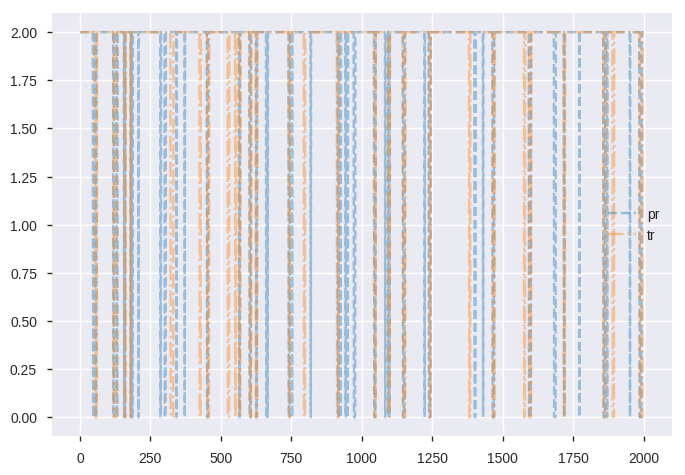

In [219]:
plt.plot(test_predict_new[:2000], '--', label='pr', alpha=0.4)
plt.plot(test_data.iloc[:2000].values, '-.', label='tr', alpha=0.4)
plt.legend()

## Отображение результата

In [220]:
from PIL import Image
import os
import shutil

In [221]:
# os.rmdir('../cache/imgs/')
shutil.rmtree('../cache/imgs/')

In [222]:
os.mkdir('../cache/imgs')

In [223]:
for i, (r, t) in enumerate(zip(test_predict_new, test_data.values)):
    im_r = np.zeros((32, 64, 3), dtype='uint8')
    if r == 0:
        im_r[:,:,0] = 255
    elif r == 1:
        im_r[...,2] = 255
    else:
        im_r[...,1] = 255
        
    im_t = np.zeros((32, 64, 3), dtype='uint8')
    if t == 0:
        im_t[:,:,0] = 255
    elif t == 1:
        im_t[...,2] = 255
    else:
        im_t[...,1] = 255
        
    im = np.vstack((im_r, im_t))
    im = Image.fromarray(im)
    im.save('../cache/imgs/test_{:04d}.png'.format(i + 2))
im.save('../cache/imgs/test_{:04d}.png'.format(0))
im.save('../cache/imgs/test_{:04d}.png'.format(1))

In [224]:
os.system('ffmpeg -r 20 -i ../cache/imgs/test_%04d.png -i ../audio/arhis1.mp3 -vcodec mpeg4 -y ../cache/a.mp4')

0